In [216]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [298]:
from collections import defaultdict
import numpy as np
from torch.utils.data import DataLoader
from random import sample
import torch
import matplotlib.pyplot as plt 
from random import sample

from vae_based_medical_image_generator.model.cvae import ConditionalVariationalAutoencoder
from vae_based_medical_image_generator.data import dataset


Using downloaded and verified file: /home/workstation/.medmnist/chestmnist.npz


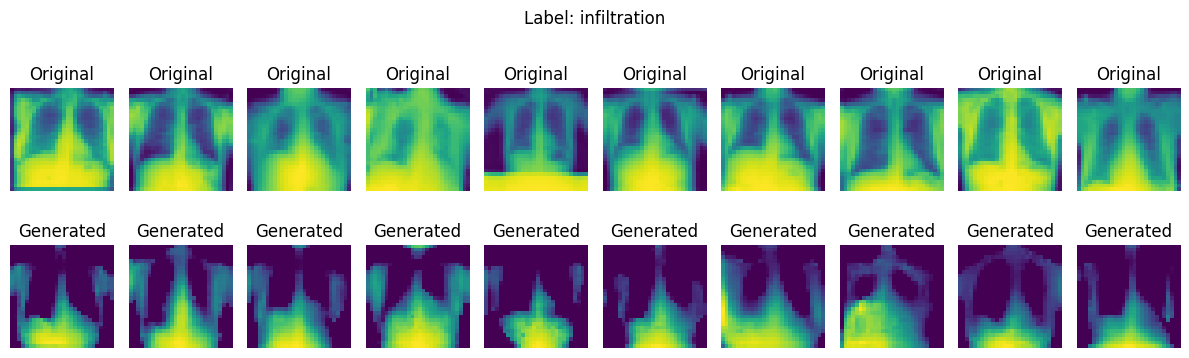

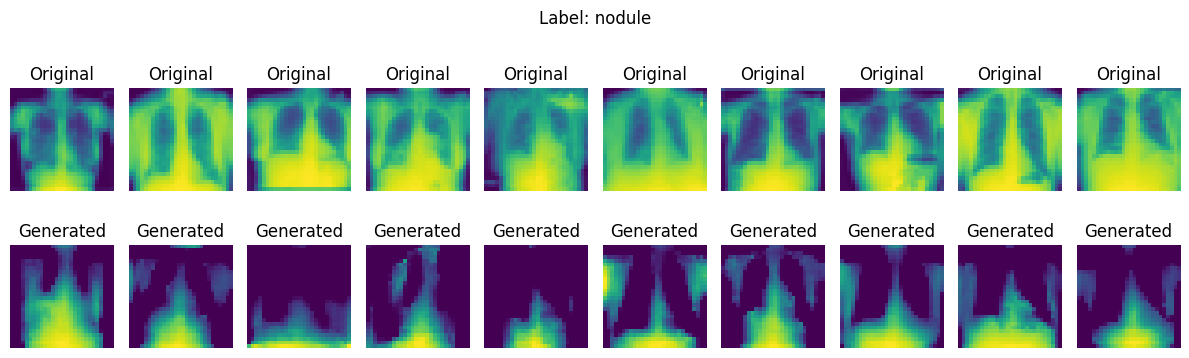

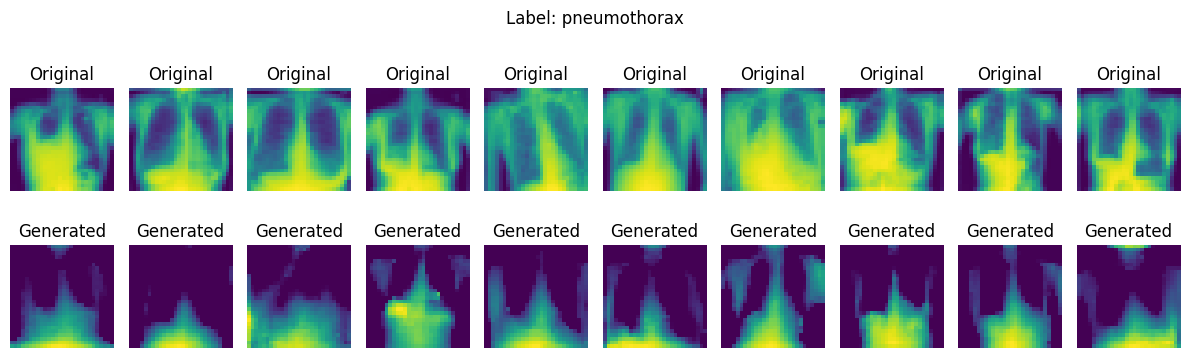

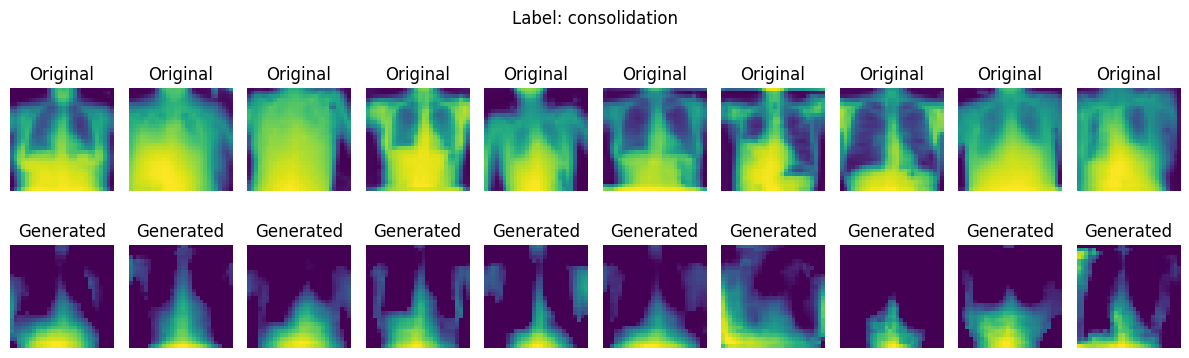

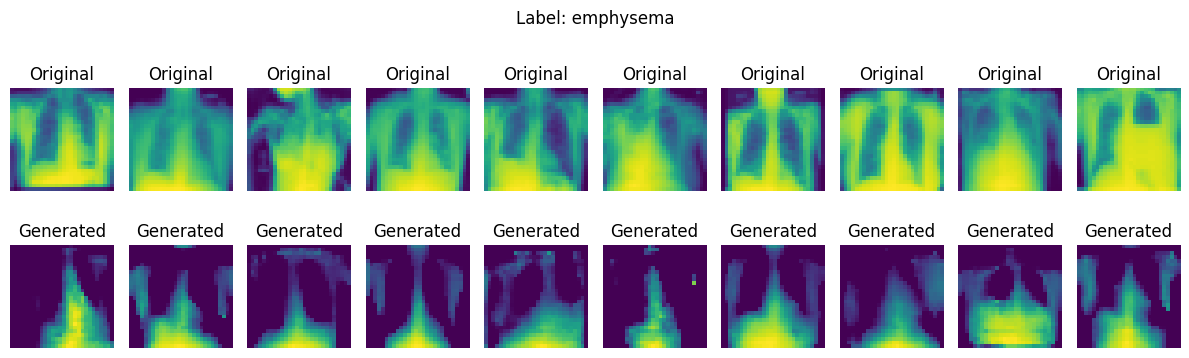

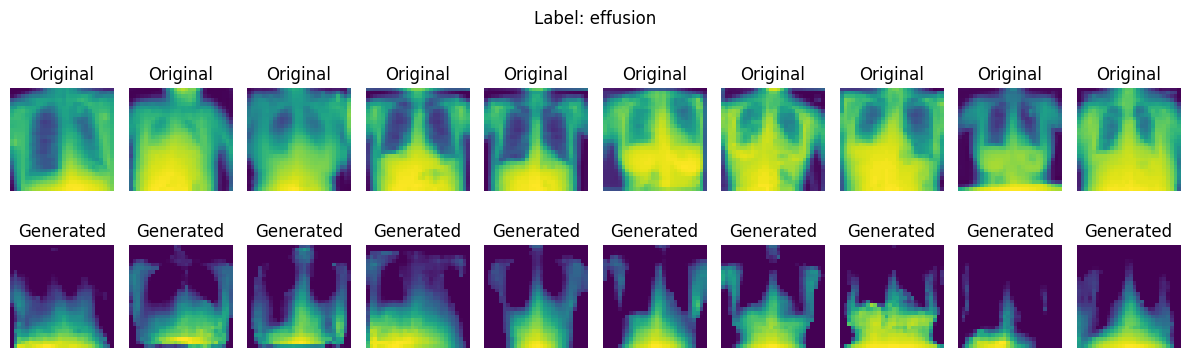

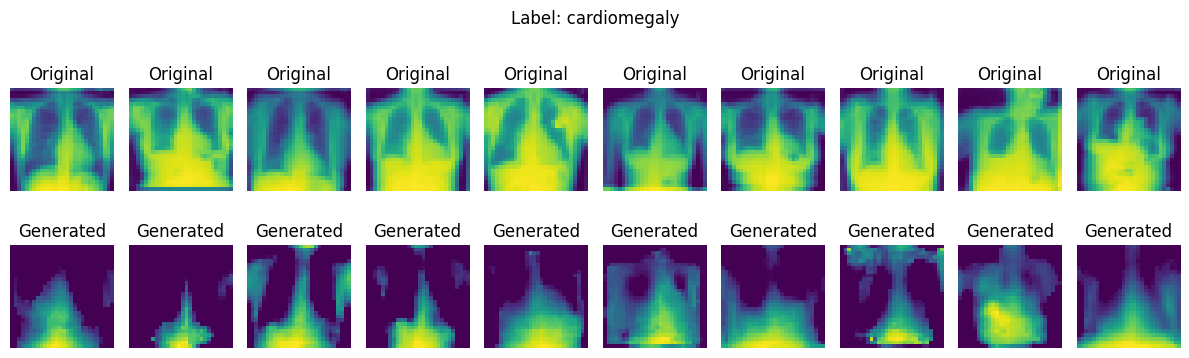

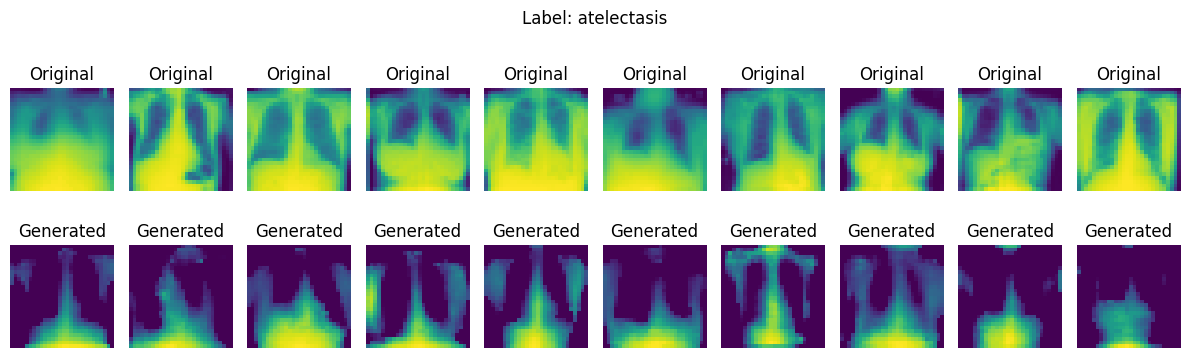

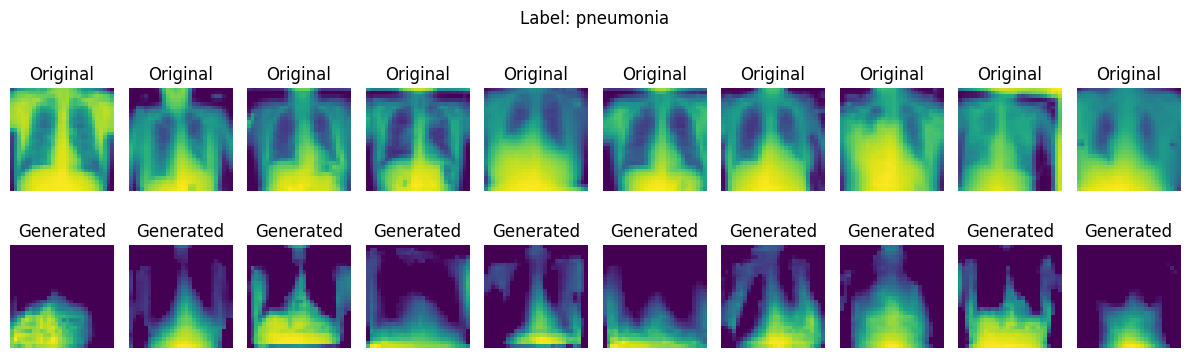

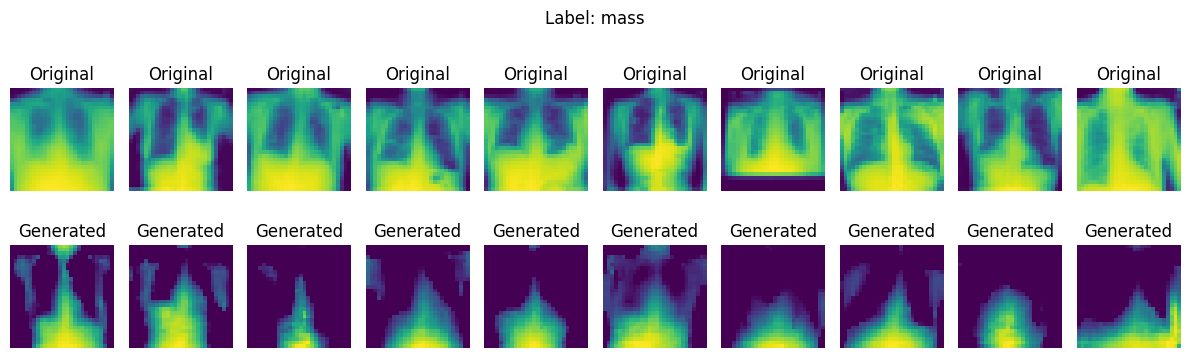

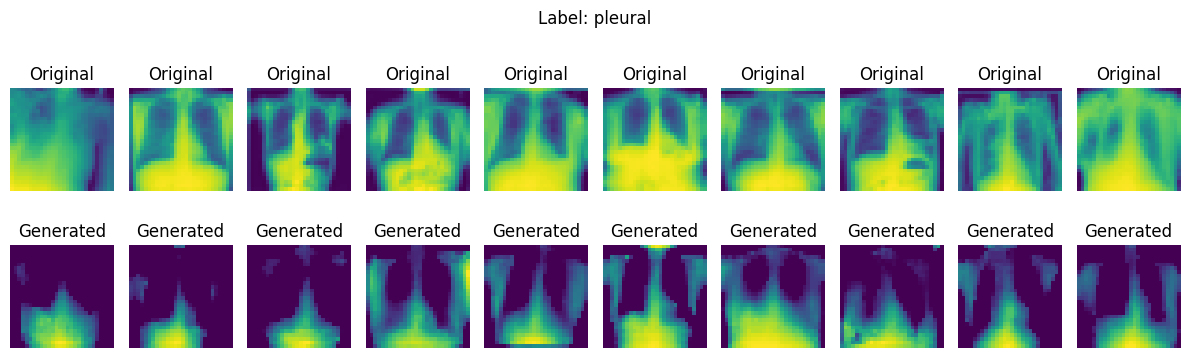

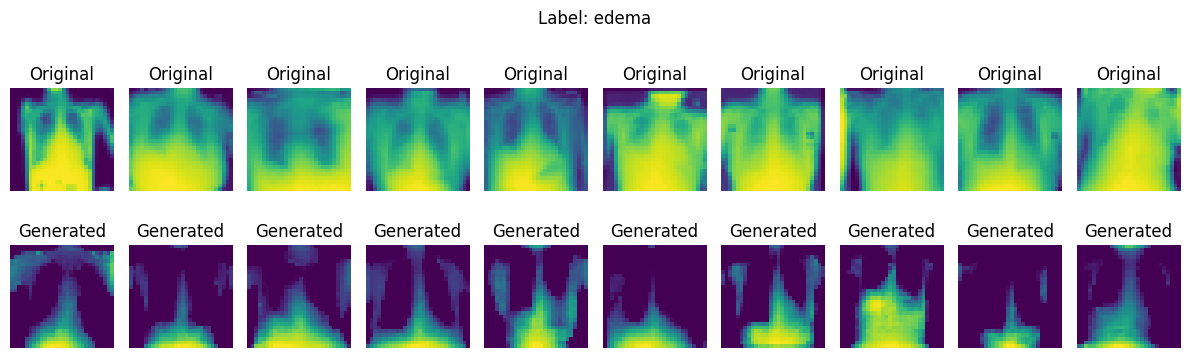

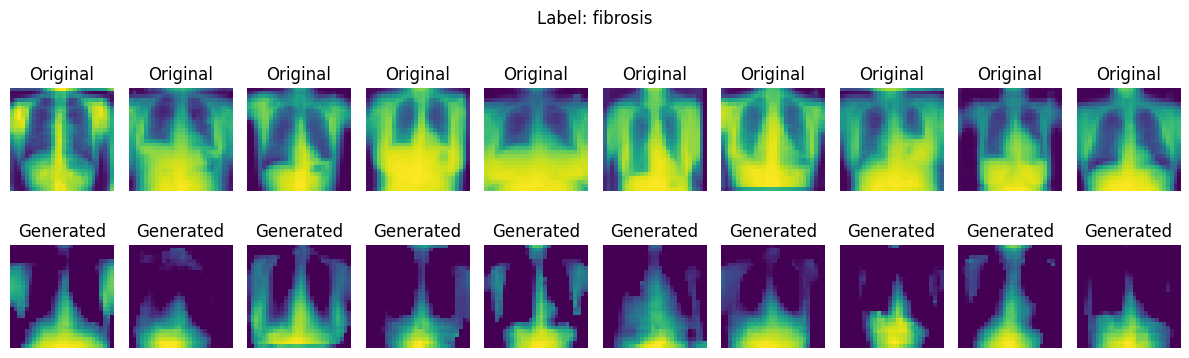

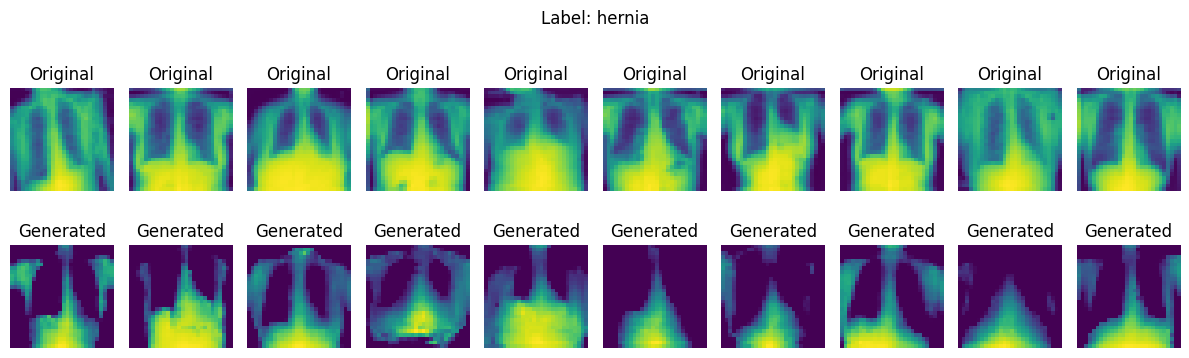

In [300]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


labels_dict = defaultdict(lambda: defaultdict(list))
img_dataset = dataset.load_dataset(dataset_name="chestmnist", split='train')
dataloader = DataLoader(img_dataset, batch_size=1, shuffle=False)

# check if data is already one hot encoded
if not img_dataset[0][1].shape[0] > 1:  
    labels_train = torch.as_tensor(dataloader.dataset.labels.squeeze()).to(torch.int64)
    img_dataset.labels = torch.nn.functional.one_hot(labels_train).numpy()


# labels den jeweiligen Klassen zuordnen
idx_array = np.array(list(img_dataset.info["label"].keys())).astype(int) + 1
for img, labels in dataloader:
    img, labels = img.numpy(), labels.numpy().squeeze()
    labels_idx = set(idx_array * labels).difference({0})  

    for idx in labels_idx:
        label_name = img_dataset.info["label"][str(idx - 1)]
        labels_dict[label_name]["orig_imgs"].append(img.squeeze(0))    

# load the model
model = ConditionalVariationalAutoencoder(image_channels=1, n_labels=len(labels_dict.keys()), latent_dimension=64, device=device).to(device)
model.load_state_dict(torch.load('../../../models/chestmnist/cvae/lr-0.001-bs-64-latent-64/checkpoint_70.pt'))

# generate images for each class
samples_per_class = 10
num_classes = len(labels_dict.keys())
one_hot_labels = torch.nn.functional.one_hot(torch.arange(num_classes)).repeat(samples_per_class, 1).to(device)
generated_labels = [list(labels_dict.keys())[label] for label in one_hot_labels.argmax(axis=1)]
generated_images = model.generate(one_hot_labels).cpu()

for img, label in zip(generated_images, generated_labels):
    labels_dict[label]["gen_imgs"].append(img.numpy())


for label in labels_dict.keys():
    orig_images = sample(labels_dict[label]["orig_imgs"], samples_per_class)
    gen_images = labels_dict[label]["gen_imgs"]


    fig, axes = plt.subplots(nrows=2, ncols=samples_per_class, figsize=(12, 4))

    for i, (orig, gen) in enumerate(zip(orig_images, gen_images)):
        orig = orig.squeeze()
        gen = gen.squeeze()
        axes[0, i].imshow(orig)
        axes[0, i].set_axis_off()
        axes[0, i].set_title("Original")

        axes[1, i].imshow(gen)
        axes[1, i].set_axis_off()
        axes[1, i].set_title("Generated")

    plt.suptitle("Label: {}".format(label))
    plt.tight_layout()
    plt.show()

Using downloaded and verified file: /home/workstation/.medmnist/bloodmnist.npz


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

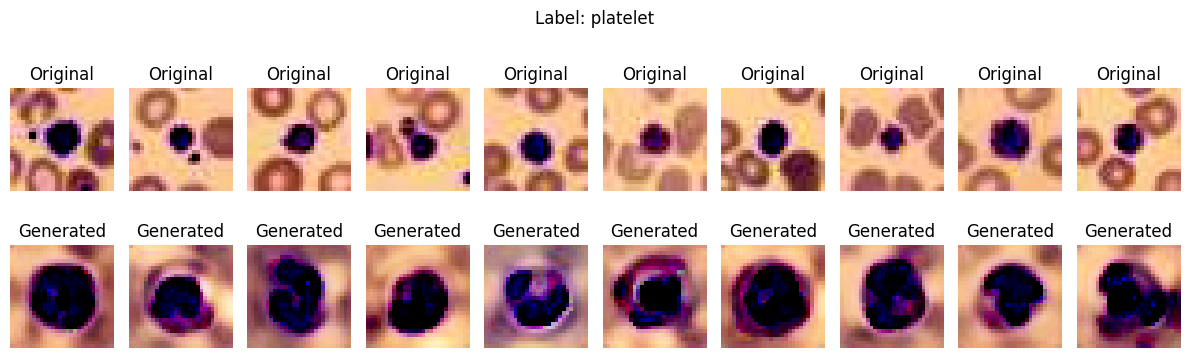

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

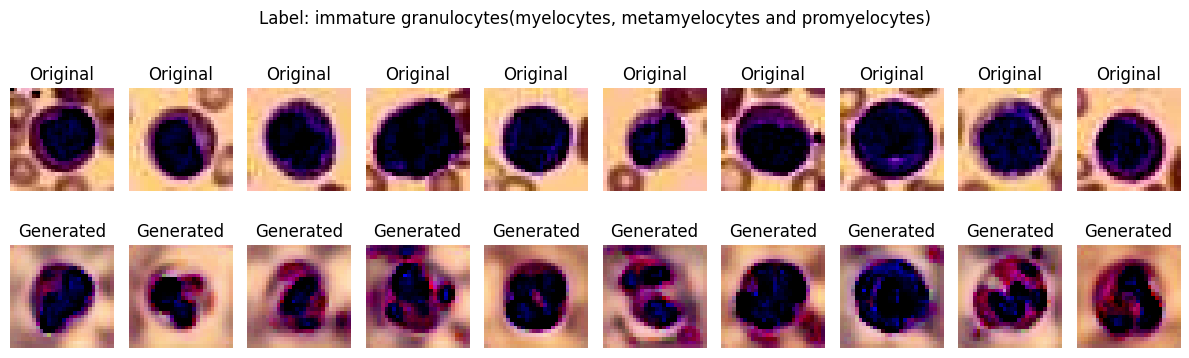

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

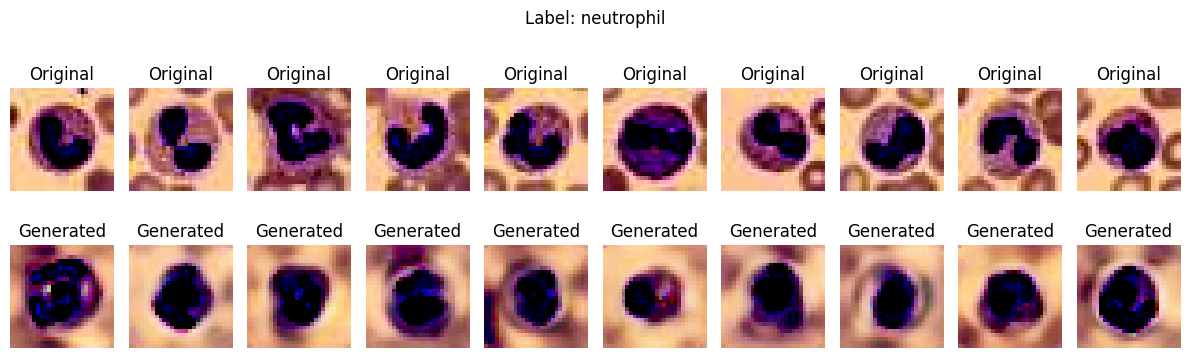

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

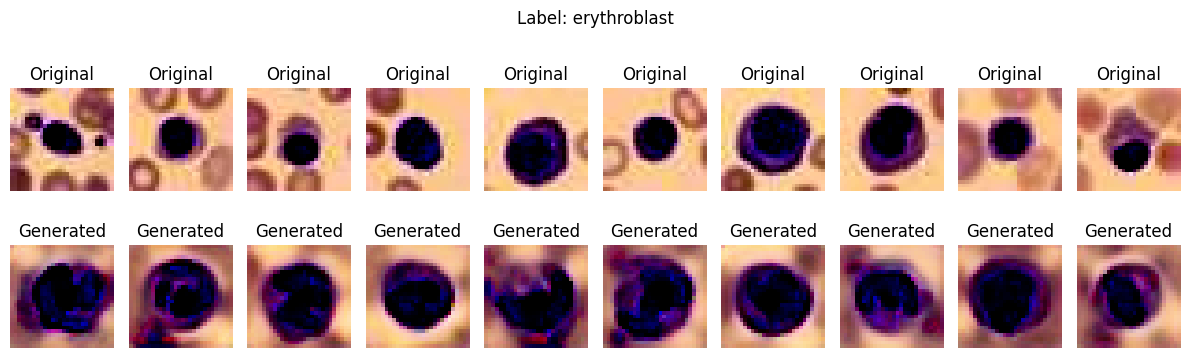

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

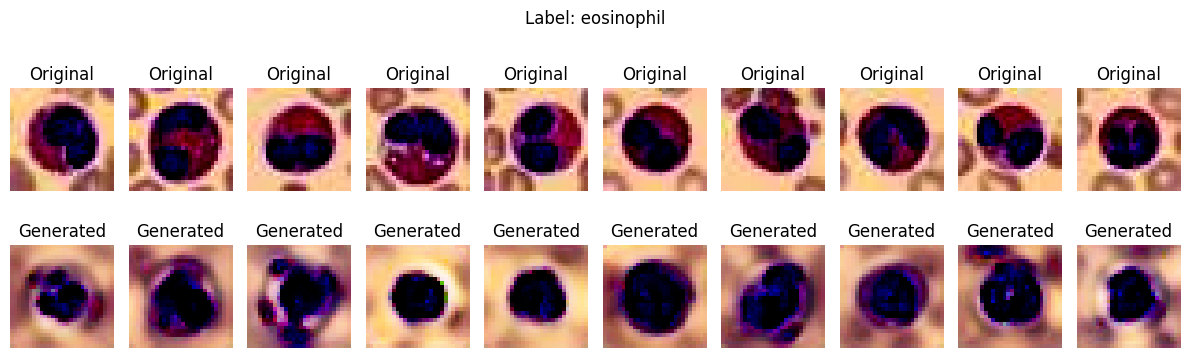

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

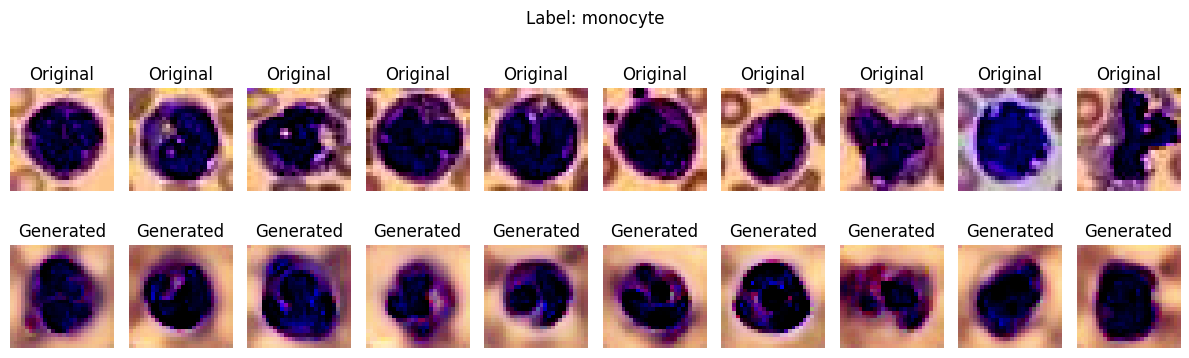

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

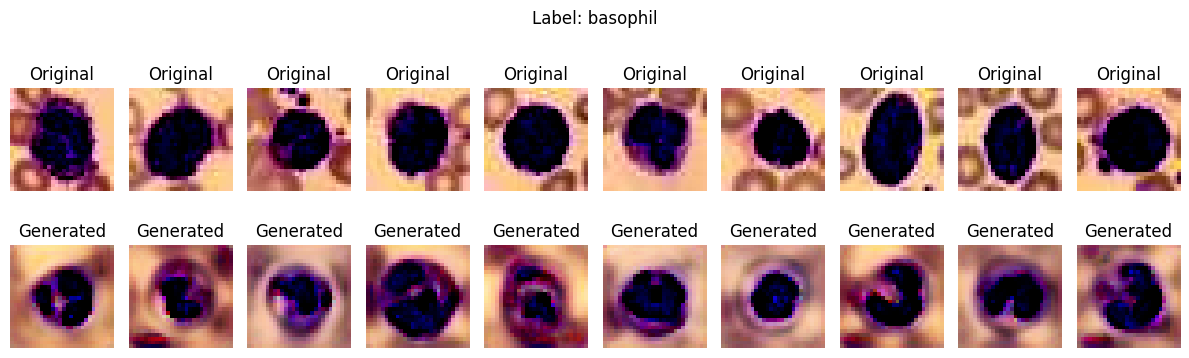

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

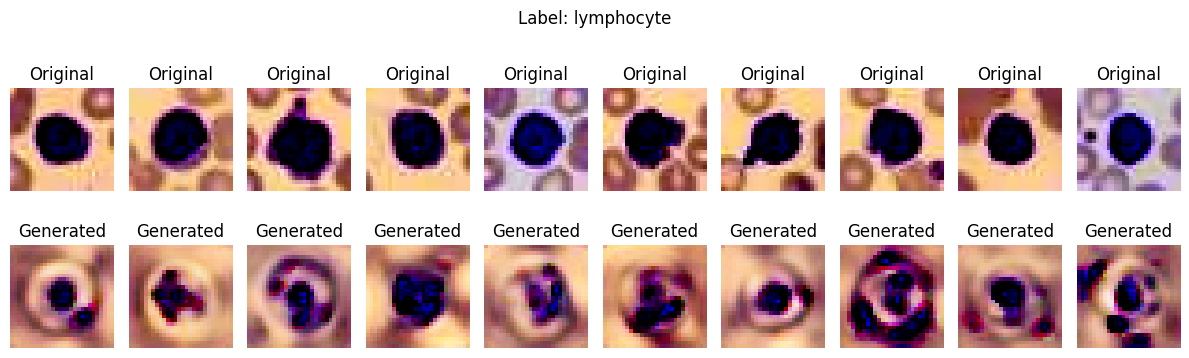

In [307]:
import skimage.color

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


labels_dict = defaultdict(lambda: defaultdict(list))
img_dataset = dataset.load_dataset(dataset_name="bloodmnist", split='train')
dataloader = DataLoader(img_dataset, batch_size=1, shuffle=False)

# check if data is already one hot encoded
if not img_dataset[0][1].shape[0] > 1:  
    labels_train = torch.as_tensor(dataloader.dataset.labels.squeeze()).to(torch.int64)
    img_dataset.labels = torch.nn.functional.one_hot(labels_train).numpy()


# labels den jeweiligen Klassen zuordnen
idx_array = np.array(list(img_dataset.info["label"].keys())).astype(int) + 1
for img, labels in dataloader:
    img, labels = img.numpy(), labels.numpy().squeeze()
    labels_idx = set(idx_array * labels).difference({0})  

    for idx in labels_idx:
        label_name = img_dataset.info["label"][str(idx - 1)]
        labels_dict[label_name]["orig_imgs"].append(img.squeeze(0))    

# load the model
model = ConditionalVariationalAutoencoder(image_channels=train_dataset.info["n_channels"], n_labels=len(labels), latent_dimension=64, device=device).to(device)
model.load_state_dict(torch.load('../../../models/bloodmnist/cvae/lr-0.001-bs-64-latent-64/checkpoint_80.pt'))


# generate images for each class
samples_per_class = 10
num_classes = len(labels_dict.keys())
one_hot_labels = torch.nn.functional.one_hot(torch.arange(num_classes)).repeat(samples_per_class, 1).to(device)
generated_labels = [list(labels_dict.keys())[label] for label in one_hot_labels.argmax(axis=1)]
generated_images = model.generate(one_hot_labels).cpu()

for img, label in zip(generated_images, generated_labels):
    labels_dict[label]["gen_imgs"].append(img.numpy())


for label in labels_dict.keys():
    orig_images = sample(labels_dict[label]["orig_imgs"], samples_per_class)
    gen_images = labels_dict[label]["gen_imgs"]


    fig, axes = plt.subplots(nrows=2, ncols=samples_per_class, figsize=(12, 4))

    for i, (orig, gen) in enumerate(zip(orig_images, gen_images)):
        axes[0, i].imshow(np.transpose(orig, (1, 2, 0)))
        axes[0, i].set_axis_off()
        axes[0, i].set_title("Original")

        axes[1, i].imshow(np.transpose(gen, (1, 2, 0)))
        axes[1, i].set_axis_off()
        axes[1, i].set_title("Generated")

    plt.suptitle("Label: {}".format(label))
    plt.tight_layout()
    plt.show()